# RandomForestRegressor
## Con los datos de la hora anterior (Del contaminante en cuestion)

In [180]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def pintarGrafico(y_pred, y_test, nombre, mae):
    cuantos = 100
    ypred = y_pred[:cuantos]
    ylabel = list(y_test)[:cuantos]
    x = list(range(len(ylabel)))
    plt.rcParams["font.size"] = 10
    figure, ax = plt.subplots(1,figsize=(4, 4),dpi=100)    
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[ypred[i],ylabel[i]],color="darkorange")

    plt.title("Prediccion para " + nombre + " mae: " + str(round(mae, 3)))
    plt.scatter(x,ypred, color='blue', label="pred",s=8)
    plt.scatter(x,ylabel, color='green', label="label",s=4)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [181]:
url ="https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df = pd.read_csv(url,parse_dates=['FECHAH'])
df = df.dropna()
df["hora"] = df['FECHAH'].dt.hour

valores = df.TIPO.unique()
for v in valores:
    print(v)
    df[v] = df.TIPO.apply(lambda x: 1 if x==v else 0)

df.head()

LABORABLE
SABADO
DOMINGO
FESTIVO


,FECHAH,TIPO,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,...,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,hora,LABORABLE,SABADO,DOMINGO,FESTIVO
5035,2019-08-01 00:00:00,LABORABLE,0.2,4.0,22.0,10.0,19.0,29.0,58.87,1.84,...,943.0,0.0,223.0,347.0,570.0,0,1,0,0,0
5036,2019-08-01 01:00:00,LABORABLE,0.2,2.0,15.0,10.0,21.0,18.0,63.73,1.97,...,943.0,0.0,173.0,231.0,404.0,1,1,0,0,0
5037,2019-08-01 02:00:00,LABORABLE,0.1,4.0,14.0,9.0,18.0,19.0,66.50,1.72,...,943.0,0.0,107.0,180.0,287.0,2,1,0,0,0
5038,2019-08-01 03:00:00,LABORABLE,0.1,1.0,14.0,10.0,18.0,15.0,66.62,1.55,...,943.0,0.0,80.0,129.0,209.0,3,1,0,0,0
5039,2019-08-01 04:00:00,LABORABLE,0.2,2.0,15.0,10.0,19.0,18.0,62.57,1.13,...,943.0,0.0,89.0,105.0,194.0,4,1,0,0,0


C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


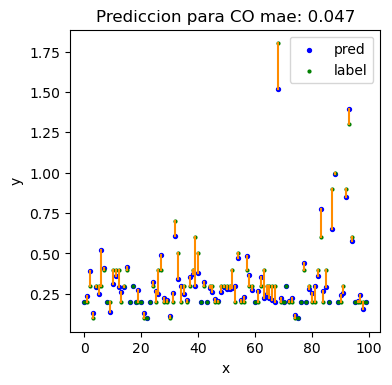

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


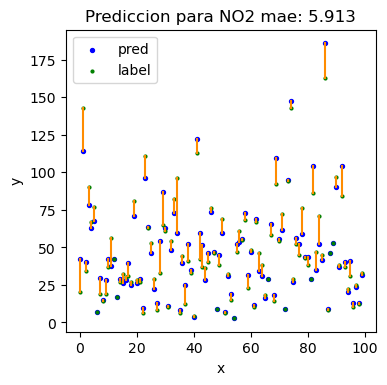

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


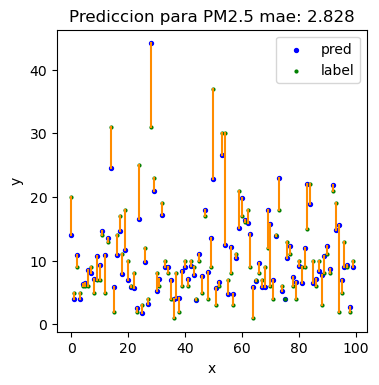

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


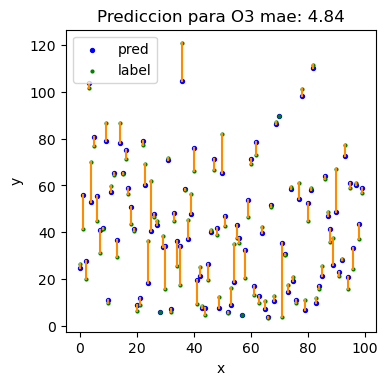

In [182]:
#df = los datos del dataframe
#coly = El contaminante a analizar.
#hAnterior = Añadir la hora anterior o no.

def get_MAE(df,coly, hAnterior):
    colsX = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO"]
    if hAnterior:
        colsX.append("pred")
        #Añadimos la columna con la prediccion de la hora anterior
        df["pred"] = df[coly].shift(+1)
        df = df[1:]

    X = df[colsX]
    y = df[coly]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    metodo = RandomForestRegressor()
    modelo = metodo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    X_test["real"] = y_test
    X_test["pred"] = y_pred
    mae = mean_absolute_error(y_pred,y_test)
    pintarGrafico(y_pred, y_test, coly, mae)
    return X_test

colContaminantes = ["CO","NO2", "PM2.5", "O3"]
for i in range(len(colContaminantes)) :
    #Se ha añadido la prediccion de la hora anterior
    df2 = df
    df_test = get_MAE(df2,colContaminantes[i], True)
    

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2589057730.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


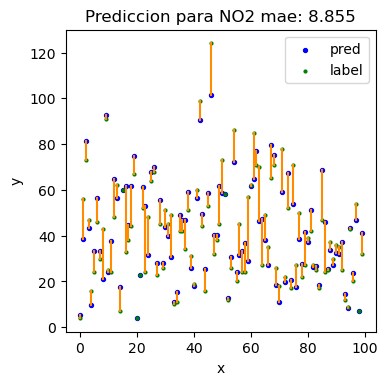

,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,hora,LABORABLE,SABADO,DOMINGO,FESTIVO,real,pred
11604,1.95,233.0,13.5,73.0,950.0,0.0,46.0,64.0,0,0,0,0,1,4.0,5.12
13244,1.06,267.0,25.3,35.0,946.0,0.0,521.0,624.0,8,1,0,0,0,56.0,38.40
15441,0.60,14.0,18.1,59.0,953.0,0.0,189.0,326.0,23,1,0,0,0,73.0,81.16
11685,0.94,79.0,19.9,57.0,944.0,0.0,259.0,405.0,9,1,0,0,0,47.0,43.43
5181,1.13,225.0,26.0,35.0,941.0,0.0,79.0,100.0,4,1,0,0,0,16.0,9.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1.70,219.0,11.3,84.0,947.0,0.0,642.0,726.0,11,1,0,0,0,26.0,28.50
5084,0.51,223.0,24.8,31.0,944.0,0.0,0.0,229.0,1,0,1,0,0,124.0,92.21
16717,0.54,70.0,6.2,90.0,950.0,0.0,42.0,42.0,3,1,0,0,0,27.0,32.06
20844,0.53,195.0,19.2,55.0,947.0,0.0,157.0,241.0,2,1,0,0,0,65.0,74.40


In [183]:
df_test = get_MAE(df, "NO2", False)
df_test

In [184]:
df.describe()

,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,...,PRECIPITACIONES,ES10,ES53,ESSUMA,hora,LABORABLE,SABADO,DOMINGO,FESTIVO,pred
count,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,...,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14704.000000
mean,0.313499,27.113635,41.350493,10.343489,15.598640,82.868956,45.255551,1.184330,144.201904,15.790139,...,0.046420,379.984563,460.153553,840.138116,11.503094,0.678069,0.133288,0.142945,0.045699,45.252305
std,0.213737,43.936022,28.759847,8.125236,12.187177,90.815689,28.698231,0.598395,84.425840,8.191275,...,0.423996,233.759281,263.406682,487.085355,6.925504,0.467233,0.339897,0.350028,0.208838,28.696507
min,0.100000,1.000000,2.000000,0.000000,1.000000,3.000000,1.780000,0.500000,0.000000,-7.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.780000
25%,0.200000,6.000000,20.000000,5.000000,8.000000,30.000000,19.260000,0.690000,68.000000,9.900000,...,0.000000,142.000000,193.000000,339.000000,6.000000,0.000000,0.000000,0.000000,0.000000,19.257500
50%,0.200000,11.000000,35.000000,8.000000,13.000000,53.000000,45.740000,1.060000,132.000000,14.300000,...,0.000000,426.000000,530.000000,945.000000,12.000000,1.000000,0.000000,0.000000,0.000000,45.740000
75%,0.400000,28.000000,55.000000,13.000000,20.000000,101.000000,66.770000,1.510000,221.000000,21.300000,...,0.000000,596.000000,700.000000,1298.000000,18.000000,1.000000,0.000000,0.000000,0.000000,66.770000
max,2.600000,580.000000,215.000000,81.000000,143.000000,1088.000000,423.400000,5.040000,358.000000,40.000000,...,17.500000,1102.000000,1039.000000,1979.000000,23.000000,1.000000,1.000000,1.000000,1.000000,423.400000


# RandomForestRegressor
## Con los datos de la hora anterior (De todos los contaminantes y elementos)

In [185]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def pintarGrafico(y_pred, y_test, nombre, mae):
    cuantos = 100
    ypred = y_pred[:cuantos]
    ylabel = list(y_test)[:cuantos]
    x = list(range(len(ylabel)))
    plt.rcParams["font.size"] = 10
    figure, ax = plt.subplots(1,figsize=(4, 4),dpi=100)    
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[ypred[i],ylabel[i]],color="darkorange")

    plt.title("Prediccion para " + nombre + " mae: " + str(round(mae, 3)))
    plt.scatter(x,ypred, color='blue', label="pred",s=8)
    plt.scatter(x,ylabel, color='green', label="label",s=4)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def get_MAE(df,coly, colsX):
    X = df[colsX]
    y = df[coly]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=8)
    metodo = RandomForestRegressor()
    modelo = metodo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    X_test["real"] = y_test
    X_test["pred"] = y_pred
    mae = mean_absolute_error(y_pred,y_test)
    pintarGrafico(y_pred, y_test, coly, mae)
    return X_test

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, columName = []):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (columName[j], i)) for j in range(n_vars)]
        #names += [('var%d(t-%d)' % (j, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % columName[j]) for j in range(n_vars)]
            #names += [('var%d(t)' % (j)) for j in range(n_vars)]
        else:
            names += [('%s(t-%d)' % (columName[j], i)) for j in range(n_vars)]
            #names += [('var%d(t+%d)' % (j, i)) for j in range(n_vars)]


  # Juntamos todo
    agg = concat(cols, axis=1)
    agg.columns = names

    #Borramos las filas con valores Nan
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg


In [186]:
url ="https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df = pd.read_csv(url,parse_dates=['FECHAH'])
df = df.dropna()
#df["hora"] = df['FECHAH'].dt.hour

#Transformamos la columna tipo en 3 columnas numericas para cada tipo (LABORABLE, SABADO, DOMINGO, FESTIVO)
valores = df.TIPO.unique()
for v in valores:
    print(v)
    df[v] = df.TIPO.apply(lambda x: 1 if x==v else 0)

#Borramos las columnas que no son necesarias.
df = df.drop(['TIPO', 'NO', 'PM10', 'NOx'], axis=1)

index=df.set_index(['FECHAH'])
index

LABORABLE
SABADO
DOMINGO
FESTIVO


,CO,NO2,PM2.5,O3,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,LABORABLE,SABADO,DOMINGO,FESTIVO
FECHAH,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,0.2,22.0,10.0,58.87,1.84,97.0,26.1,52.0,943.0,0.0,223.0,347.0,570.0,1,0,0,0
2019-08-01 01:00:00,0.2,15.0,10.0,63.73,1.97,117.0,24.9,55.0,943.0,0.0,173.0,231.0,404.0,1,0,0,0
2019-08-01 02:00:00,0.1,14.0,9.0,66.50,1.72,96.0,24.0,55.0,943.0,0.0,107.0,180.0,287.0,1,0,0,0
2019-08-01 03:00:00,0.1,14.0,10.0,66.62,1.55,106.0,23.3,55.0,943.0,0.0,80.0,129.0,209.0,1,0,0,0
2019-08-01 04:00:00,0.2,15.0,10.0,62.57,1.13,67.0,22.9,57.0,943.0,0.0,89.0,105.0,194.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 10:00:00,0.3,38.0,9.0,47.20,1.37,79.0,18.3,46.0,953.0,0.0,587.0,658.0,1245.0,1,0,0,0
2021-05-25 11:00:00,0.3,37.0,7.0,60.22,1.93,62.0,19.3,42.0,953.0,0.0,582.0,651.0,1233.0,1,0,0,0
2021-05-25 12:00:00,0.2,31.0,7.0,73.93,1.53,12.0,21.2,38.0,952.0,0.0,573.0,743.0,1316.0,1,0,0,0


In [187]:
columName = index.columns.values

#Seleccionamos las horas que queremos retrasar
horasRetraso = 10
data_series = series_to_supervised(index, horasRetraso, 0, True, columName)
data_series

,CO(t-10),NO2(t-10),PM2.5(t-10),O3(t-10),VELOCIDAD VIENTO(t-10),DIR. VIENTO(t-10),TEMPERATURA(t-10),HUMEDAD RELATIVA(t-10),PRESION BAROMETRICA(t-10),PRECIPITACIONES(t-10),...,HUMEDAD RELATIVA(t-1),PRESION BAROMETRICA(t-1),PRECIPITACIONES(t-1),ES10(t-1),ES53(t-1),ESSUMA(t-1),LABORABLE(t-1),SABADO(t-1),DOMINGO(t-1),FESTIVO(t-1)
FECHAH,,,,,,,,,,,,,,,,,,,,,
2019-08-01 10:00:00,0.2,22.0,10.0,58.87,1.84,97.0,26.1,52.0,943.0,0.0,...,51.0,944.0,0.0,550.0,606.0,1156.0,1.0,0.0,0.0,0.0
2019-08-01 11:00:00,0.2,15.0,10.0,63.73,1.97,117.0,24.9,55.0,943.0,0.0,...,48.0,944.0,0.0,526.0,655.0,1181.0,1.0,0.0,0.0,0.0
2019-08-01 12:00:00,0.1,14.0,9.0,66.50,1.72,96.0,24.0,55.0,943.0,0.0,...,44.0,944.0,0.0,549.0,680.0,1229.0,1.0,0.0,0.0,0.0
2019-08-01 13:00:00,0.1,14.0,10.0,66.62,1.55,106.0,23.3,55.0,943.0,0.0,...,41.0,944.0,0.0,576.0,692.0,1268.0,1.0,0.0,0.0,0.0
2019-08-01 14:00:00,0.2,15.0,10.0,62.57,1.13,67.0,22.9,57.0,943.0,0.0,...,33.0,944.0,0.0,576.0,697.0,1273.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 10:00:00,0.2,16.0,2.0,77.89,0.89,300.0,17.8,44.0,951.0,0.0,...,56.0,953.0,0.0,715.0,753.0,1468.0,1.0,0.0,0.0,0.0
2021-05-25 11:00:00,0.2,19.0,2.0,74.47,0.57,226.0,16.6,45.0,951.0,0.0,...,46.0,953.0,0.0,587.0,658.0,1245.0,1.0,0.0,0.0,0.0
2021-05-25 12:00:00,0.2,10.0,1.0,89.85,0.68,257.0,16.1,41.0,951.0,0.0,...,42.0,953.0,0.0,582.0,651.0,1233.0,1.0,0.0,0.0,0.0


In [188]:
index2 = index[horasRetraso:]
index2

,CO,NO2,PM2.5,O3,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,LABORABLE,SABADO,DOMINGO,FESTIVO
FECHAH,,,,,,,,,,,,,,,,,
2019-08-01 10:00:00,0.2,40.0,9.0,48.54,1.35,83.0,25.3,48.0,944.0,0.0,526.0,655.0,1181.0,1,0,0,0
2019-08-01 11:00:00,0.2,47.0,12.0,50.82,1.23,88.0,27.3,44.0,944.0,0.0,549.0,680.0,1229.0,1,0,0,0
2019-08-01 12:00:00,0.2,39.0,14.0,63.91,1.26,205.0,28.4,41.0,944.0,0.0,576.0,692.0,1268.0,1,0,0,0
2019-08-01 13:00:00,0.2,34.0,12.0,82.85,1.39,192.0,30.8,33.0,944.0,0.0,576.0,697.0,1273.0,1,0,0,0
2019-08-01 14:00:00,0.2,27.0,8.0,98.50,2.10,182.0,31.9,26.0,943.0,0.0,574.0,679.0,1253.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 10:00:00,0.3,38.0,9.0,47.20,1.37,79.0,18.3,46.0,953.0,0.0,587.0,658.0,1245.0,1,0,0,0
2021-05-25 11:00:00,0.3,37.0,7.0,60.22,1.93,62.0,19.3,42.0,953.0,0.0,582.0,651.0,1233.0,1,0,0,0
2021-05-25 12:00:00,0.2,31.0,7.0,73.93,1.53,12.0,21.2,38.0,952.0,0.0,573.0,743.0,1316.0,1,0,0,0


In [189]:
nColumns = data_series.columns
nColumns

Index(['CO(t-10)', 'NO2(t-10)', 'PM2.5(t-10)', 'O3(t-10)',
       'VELOCIDAD VIENTO(t-10)', 'DIR. VIENTO(t-10)', 'TEMPERATURA(t-10)',
       'HUMEDAD RELATIVA(t-10)', 'PRESION BAROMETRICA(t-10)',
       'PRECIPITACIONES(t-10)',
       ...
       'HUMEDAD RELATIVA(t-1)', 'PRESION BAROMETRICA(t-1)',
       'PRECIPITACIONES(t-1)', 'ES10(t-1)', 'ES53(t-1)', 'ESSUMA(t-1)',
       'LABORABLE(t-1)', 'SABADO(t-1)', 'DOMINGO(t-1)', 'FESTIVO(t-1)'],
      dtype='object', length=170)

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


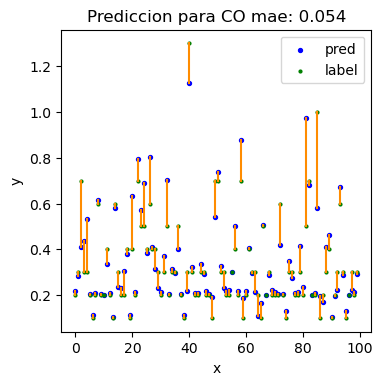

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


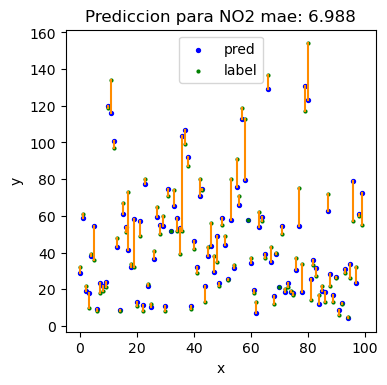

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


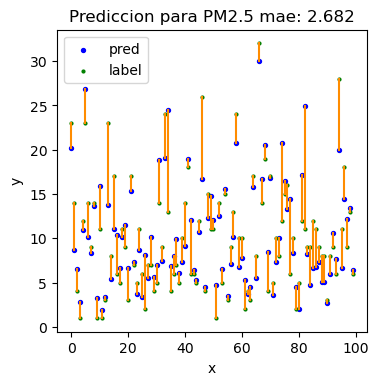

C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_4968/2073180806.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


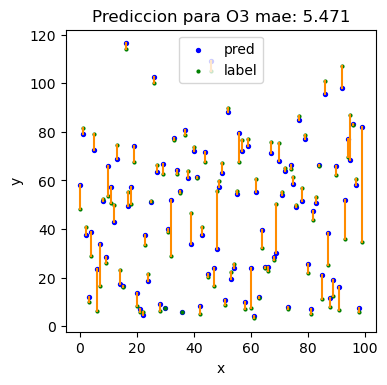

In [192]:
colContaminantes = ["CO","NO2", "PM2.5", "O3"]
for i in range(len(colContaminantes)) :
    df2 = data_series.copy()
    #Se ha añadido la prediccion de la hora anterior
    df2[colContaminantes[i]] = index2[colContaminantes[i]]
    df_test = get_MAE(df2,colContaminantes[i], nColumns)
    data_series = data_series.drop(colContaminantes[i], axis=1)
  

In [191]:
data_series.head()

,CO(t-10),NO2(t-10),PM2.5(t-10),O3(t-10),VELOCIDAD VIENTO(t-10),DIR. VIENTO(t-10),TEMPERATURA(t-10),HUMEDAD RELATIVA(t-10),PRESION BAROMETRICA(t-10),PRECIPITACIONES(t-10),...,HUMEDAD RELATIVA(t-1),PRESION BAROMETRICA(t-1),PRECIPITACIONES(t-1),ES10(t-1),ES53(t-1),ESSUMA(t-1),LABORABLE(t-1),SABADO(t-1),DOMINGO(t-1),FESTIVO(t-1)
FECHAH,,,,,,,,,,,,,,,,,,,,,
2019-08-01 10:00:00,0.2,22.0,10.0,58.87,1.84,97.0,26.1,52.0,943.0,0.0,...,51.0,944.0,0.0,550.0,606.0,1156.0,1.0,0.0,0.0,0.0
2019-08-01 11:00:00,0.2,15.0,10.0,63.73,1.97,117.0,24.9,55.0,943.0,0.0,...,48.0,944.0,0.0,526.0,655.0,1181.0,1.0,0.0,0.0,0.0
2019-08-01 12:00:00,0.1,14.0,9.0,66.50,1.72,96.0,24.0,55.0,943.0,0.0,...,44.0,944.0,0.0,549.0,680.0,1229.0,1.0,0.0,0.0,0.0
2019-08-01 13:00:00,0.1,14.0,10.0,66.62,1.55,106.0,23.3,55.0,943.0,0.0,...,41.0,944.0,0.0,576.0,692.0,1268.0,1.0,0.0,0.0,0.0
2019-08-01 14:00:00,0.2,15.0,10.0,62.57,1.13,67.0,22.9,57.0,943.0,0.0,...,33.0,944.0,0.0,576.0,697.0,1273.0,1.0,0.0,0.0,0.0
